params: 24,025,600
--------------------------------------------------
(363, 338, 3)


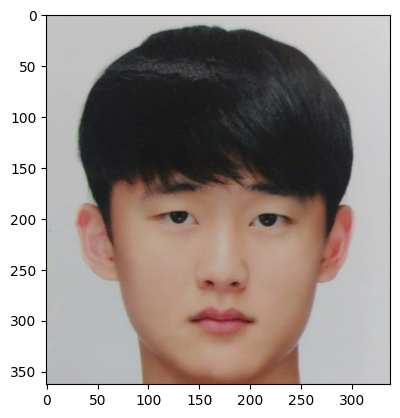

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 112, 112])


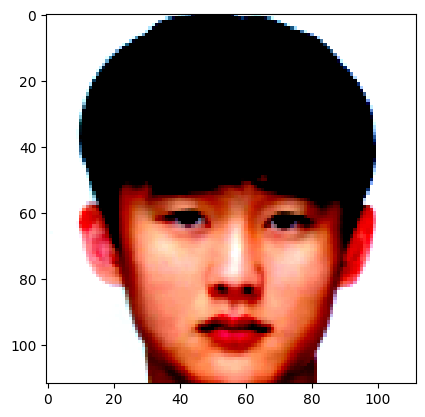

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([112, 112, 3])
torch.Size([72, 112, 3])


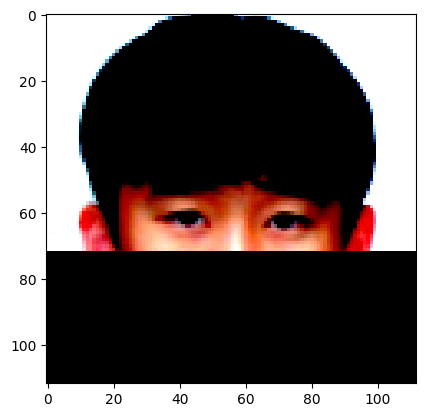

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


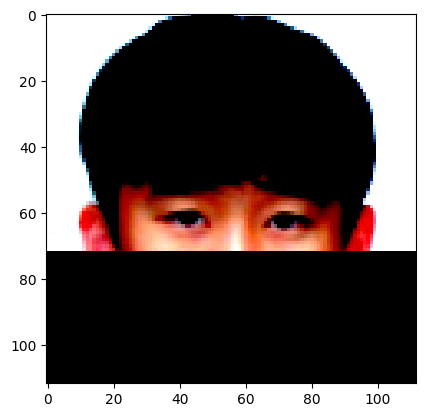

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])
--------------------------------------------------
(3088, 2316, 3)


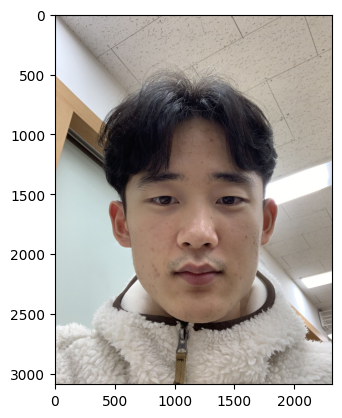

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 112, 112])


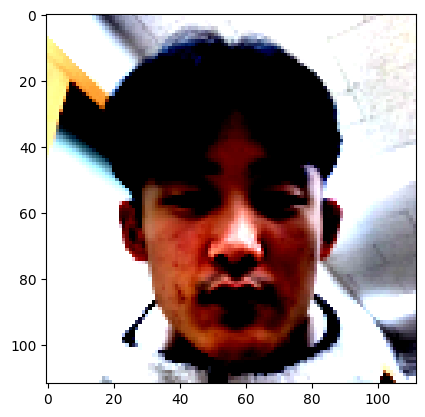

torch.Size([112, 112, 3])
torch.Size([72, 112, 3])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


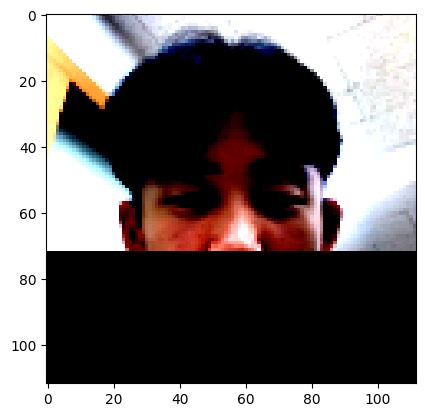

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


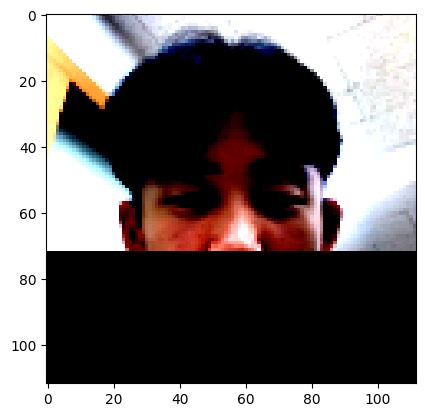

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])
--------------------------------------------------
(531, 449, 3)


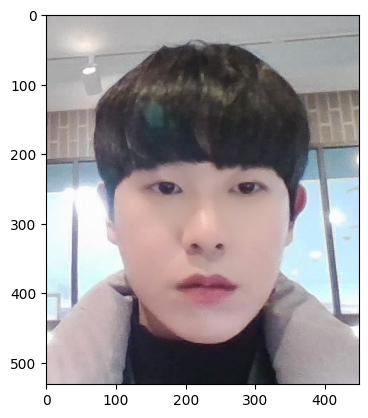

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 112, 112])


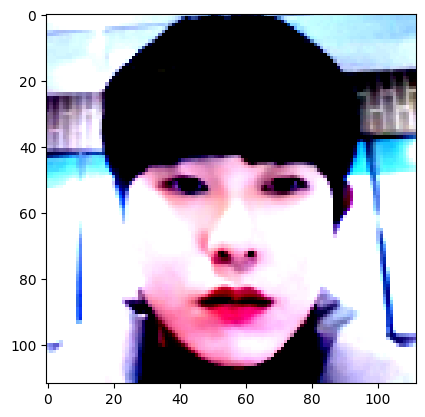

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([112, 112, 3])
torch.Size([65, 112, 3])


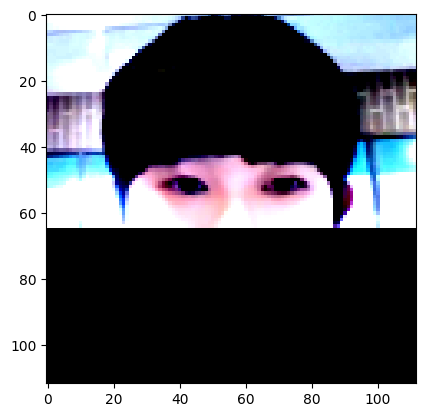

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])
--------------------------------------------------
(616, 624, 3)


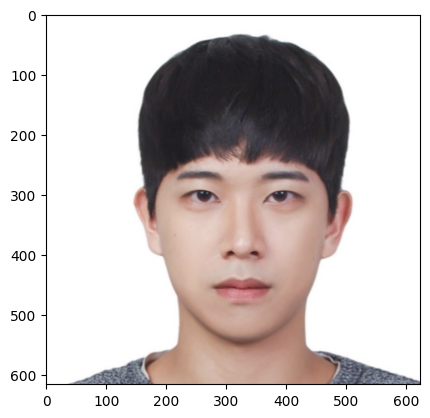

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 112, 112])


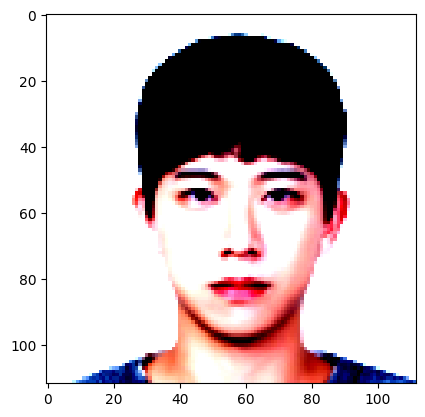

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([112, 112, 3])
torch.Size([65, 112, 3])


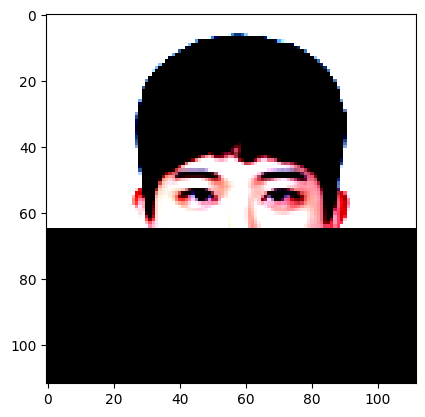

inputs shape: torch.Size([1, 3, 112, 112])
outputs shape: torch.Size([1, 512])


In [26]:
import os
import torch
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from torch import nn
from torch.utils.checkpoint import checkpoint
from torchvision import transforms
from model import get_model

base_dir = "/home/ljj0512/private/workspace/CV-project/Computer-Vision-Project/"

model = get_model()

vector_list = []
for i in range(4):
    print("-"*50)
    np_img = cv2.imread(os.path.join(base_dir,f"images/{i}.jpg"))
    np_img = cv2.cvtColor(np_img, cv2.COLOR_RGB2BGR)
    # np_img = np.array(img)
    if np_img.shape[-1] > 3:
        print("alpha channel remove")
        np_img = np_img[:,:,0:3]

    print(np_img.shape)
    plt.imshow(np_img)
    plt.show()

    min_size = min(np_img.shape[0:-1])
    image_transforms = transforms.Compose([
            transforms.ToPILImage(),
            transforms.CenterCrop((min_size,min_size)),
            transforms.Resize(size=(112,112)), 
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406], 
                [0.229, 0.224, 0.225]
            )
        ])

    torch_img = image_transforms(np_img)
    C, H, W = torch_img.size()
    torch_img = torch_img.view(1,C,H,W)
    print(torch_img.shape)
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    if i==0 or i==1:
        print(torch_img.view(C,H,W).permute(1,2,0).shape)
        print(torch_img.view(C,H,W).permute(1,2,0)[:72,:,:].shape)
        torch_img.view(C,H,W).permute(1,2,0)[72:113,:,:] = 0.0
    if i==2 or i==3:
        print(torch_img.view(C,H,W).permute(1,2,0).shape)
        print(torch_img.view(C,H,W).permute(1,2,0)[:65,:,:].shape)
        torch_img.view(C,H,W).permute(1,2,0)[65:113,:,:] = 0.0
    plt.imshow(torch_img.view(C,H,W).permute(1,2,0))
    plt.show()
    print("inputs shape:", torch_img.shape)
    
    with torch.no_grad():
        model.eval()
        outputs = model(torch_img)
    print("outputs shape:", outputs.shape)
    vector_list.append(outputs)

In [27]:
def euclidean(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return torch.sqrt(torch.pow(x-y,2)).sum()

print(euclidean(vector_list[0],vector_list[1]))
print(euclidean(vector_list[0],vector_list[2]))
print(euclidean(vector_list[0],vector_list[3]))
print()
print(euclidean(vector_list[2],vector_list[3]))
print(euclidean(vector_list[2],vector_list[0]))
print(euclidean(vector_list[2],vector_list[1]))

tensor(243.7510)
tensor(257.8268)
tensor(271.4589)

tensor(226.0491)
tensor(257.8268)
tensor(235.6322)


In [28]:
def cos_sim(x:torch.tensor, y:torch.tensor)->torch.tensor:
    return x.view(-1).dot(y.view(-1)) / (torch.norm(x)*torch.norm(y))
    
print(cos_sim(vector_list[0],vector_list[1]))
print(cos_sim(vector_list[0],vector_list[2]))
print(cos_sim(vector_list[0],vector_list[3]))
print()
print(cos_sim(vector_list[2],vector_list[3]))
print(cos_sim(vector_list[2],vector_list[0]))
print(cos_sim(vector_list[2],vector_list[1]))

tensor(0.4838)
tensor(0.3280)
tensor(0.3096)

tensor(0.3798)
tensor(0.3280)
tensor(0.3179)


In [12]:
# print(torch.pow(torch.tensor([4,2]),2))
# print(torch.sqrt(torch.tensor([4,2])))
# print(torch.tensor([4,2]).sum())
x = torch.tensor([[1.,2.]])
y = torch.tensor([[2.,2.]])
print(cos_sim(x,y))
print(cos_sim(y,x))
print()
print(y.view(-1).shape)
print(x@y.T)
print(x.view(-1).dot(y.view(-1)))
print(torch.norm(x))
print(torch.norm(y))
print()
print(x.view(-1).dot(y.view(-1))/(torch.norm(y)*torch.norm(x)))

tensor([[7.5895]])
tensor([[4.7434]])

torch.Size([2])
tensor([[6.]])
tensor(6.)
tensor(2.2361)
tensor(2.8284)

tensor(0.9487)


In [72]:
x = torch.tensor([1.,2.])
y = torch.tensor([2.,2.])
print(x@y.T)
print(x.dot(y))

tensor(6.)
tensor(6.)


In [81]:
from torchvision import models
# model = models.resnet18(models.ResNet18_Weights.DEFAULT)
# print("params: {:,}".format(sum([p.data.nelement() for p in model.parameters()])))
# x = torch.randn((3,3,224,224))
x = np.random.random((3,3,224,224))
print(torch.from_numpy(x).shape)
# print(model)

torch.Size([3, 3, 224, 224])


In [24]:
print(np_img.shape)
print(max(np_img.shape))

(3088, 2316, 3)
3088


In [22]:
max([1,2,4,2])

4